In [1]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [4]:
import nltk 
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
stop_words.remove('not')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Anshuman
[nltk_data]     Vashishtha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Anshuman
[nltk_data]     Vashishtha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Anshuman
[nltk_data]     Vashishtha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Anshuman
[nltk_data]     Vashishtha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
 df=pd.read_csv('delhi.csv')

In [7]:
df=df[df['content'].str.len()>200]

In [13]:
df

,date,content,clean
1,2022-10-19 18:31:32+00:00,દેશના વડાપ્રધાનશ્રી નરેન્દ્ર મોદી અને ગુજરાતના...,દેશના વડાપ્રધાનશ્રી નરેન્દ્ર મોદી અને ગુજરાતના...
2,2022-10-19 18:31:28+00:00,कांग्रेस ने अपना अध्यक्ष लोकतांत्रिक तरीके से ...,कांग्रेस ने अपना अध्यक्ष लोकतांत्रिक तरीके से ...
7,2022-10-19 18:30:26+00:00,सच ही कहा है सीखने की कोई उम्र नहीं होती @msis...,सच ही कहा है सीखने की कोई उम्र नहीं होती msiso...
8,2022-10-19 18:30:16+00:00,@FactsAnalyst @Dr_Uditraj @INCIndia कहने को तो...,factsanalyst druditraj incindia कहने को तो अध्...
11,2022-10-19 18:28:20+00:00,@ssr99 @sardesairajdeep @SupriyaShrinate Any s...,ssr99 sardesairajdeep supriyashrin song amp da...
...,...,...,...
9991,2022-10-16 04:45:38+00:00,@AnkushM18248414 @uthamkorekkana @AamAadmiPart...,ankushm18248414 uthamkorekkana aamaadmiparti h...
9994,2022-10-16 04:43:14+00:00,@shubhammontygoe @BJP4India @Bhupendraupbjp @J...,shubhammontygo bjp4india bhupendraupbjp jpsrat...
9995,2022-10-16 04:42:49+00:00,@BJP4India स्कूल हॉस्पिटल कितने बनवाए यह बताओ ...,bjp4india स्कूल हॉस्पिटल कितने बनवाए यह बताओ म...
9996,2022-10-16 04:42:32+00:00,@Himanshu_Aap_ @AAPNareshBalyan @AamAadmiParty...,himanshuaap aapnareshbalyan aamaadmiparti aapd...


In [9]:
df.columns

Index(['sentiment', 'text', 'label'], dtype='object')

In [ ]:
# 2 for positive 
# 0 for negative

In [9]:
 df=df.drop('Unnamed: 0',axis=1)

In [10]:
def preprocess_text(text):
    text=text.lower()
    #remove urls
    text=re.sub(r"http\S+|www\S+|https\S+", "",text,flags=re.MULTILINE)
    text=text.translate(str.maketrans("", "",string.punctuation))
    text=re.sub(r'\@\w+|\#', "",text)
    text_tokens=word_tokenize(text)
    fil_words=[word for word in text_tokens if word not in stop_words]
    
    #stemming
    ps=PorterStemmer()
    stem_words=[ps.stem(w) for w in fil_words]
    
    #lemmatizing
    lemmatizer = WordNetLemmatizer()
    lem_words=[lemmatizer.lemmatize(w, pos='a') for w in stem_words]
    
    return " ".join(lem_words)
    

     

In [18]:
from textblob import TextBlob
def sentiment_analysis(tweet):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 tweet['TextBlob_Subjectivity'] = tweet['clean'].apply(getSubjectivity)
 tweet['TextBlob_Polarity'] = tweet['clean'].apply(getPolarity)
 def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
 tweet ['TextBlob_Analysis'] = tweet  ['TextBlob_Polarity'].apply(getAnalysis )
 return tweet

dfnew=sentiment_analysis(df)

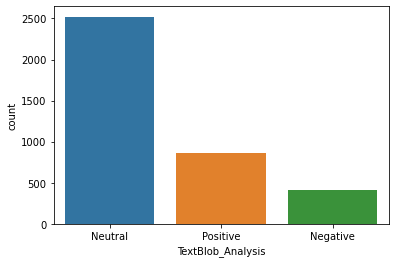

In [19]:
sns.countplot(dfnew.TextBlob_Analysis)
plt.show()

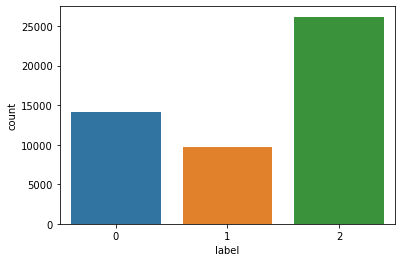

In [12]:
sns.countplot(df.label)
plt.show()

In [13]:
df.label.value_counts()

2    26180
0    14165
1     9655
Name: label, dtype: int64

In [11]:
df['clean']=df['content'].apply(preprocess_text);

In [9]:
df.drop(df[(df['label']==1)].index, inplace=True,axis=0)
df.head()
df.shape

(40345, 3)

In [12]:
def get_n_grams(text,low_n,high_n,top_number):
    
    # create vocabulary
    vec = CountVectorizer(ngram_range=(low_n,high_n)).fit(text)
    B_O_G = vec.transform(text)
    
    # Get words Count
    words_count = B_O_G.sum(axis=0)
    
    # create list of words counts
    word_counts_list = np.array(words_count)[0].tolist()
    
    # create tuple of word and words count
    data = [ (word ,word_counts_list[idx]) for word,idx in vec.vocabulary_.items() ]
    
    # sort words by count descending
    sorted_data = sorted(data,key=lambda x:x[1] ,reverse=True)
    sorted_data = sorted_data[:top_number]
    new_s = []
    for d , n in sorted_data:
        new_s.append([d ,n])
    
    del vec , data ,B_O_G ,words_count,word_counts_list ,sorted_data
    plt.figure(figsize=(10,5))
    sns.barplot(data = pd.DataFrame(new_s,columns=['word','count']),x='word',y='count')
    plt.xticks(rotation=90)
    plt.show()
    
    return pd.DataFrame(new_s,columns=['word','count'])

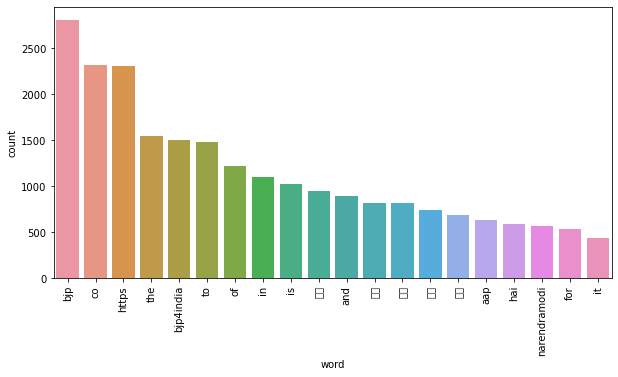

,word,count
0,bjp,2809
1,co,2311
2,https,2306
3,the,1549
4,bjp4india,1498
5,to,1479
6,of,1222
7,in,1101
8,is,1027
9,कर,954


In [14]:
get_n_grams(df.content,1,1,20)

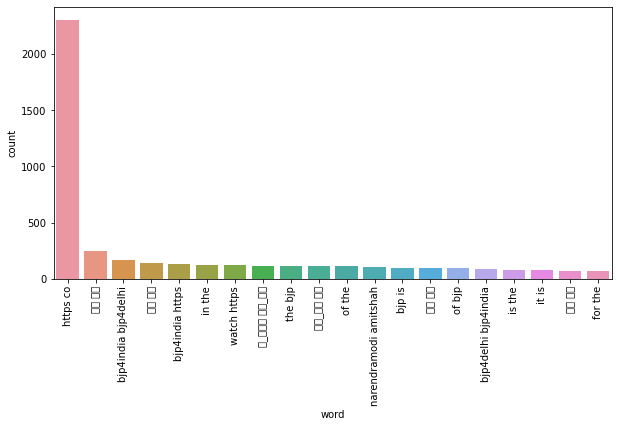

,word,count
0,https co,2306
1,अध यक,243
2,bjp4india bjp4delhi,164
3,कर रह,143
4,bjp4india https,131
5,in the,126
6,watch https,124
7,च_परम वर_सम,112
8,the bjp,111
9,वर_सम लन,111


In [15]:
get_n_grams(df.content,2,2,20)

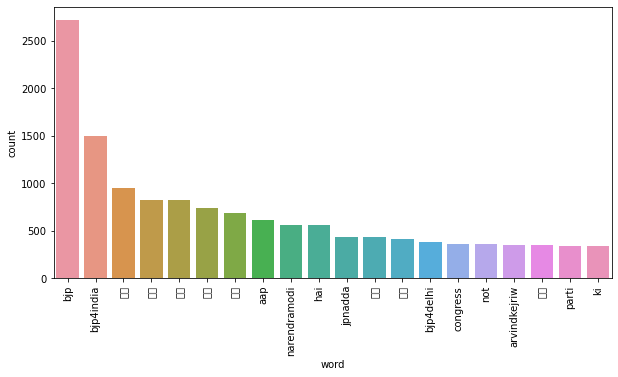

,word,count
0,bjp,2723
1,bjp4india,1494
2,कर,946
3,पर,820
4,रह,820
5,और,743
6,नह,691
7,aap,619
8,narendramodi,565
9,hai,564


In [16]:
get_n_grams(df.clean,1,1,20)

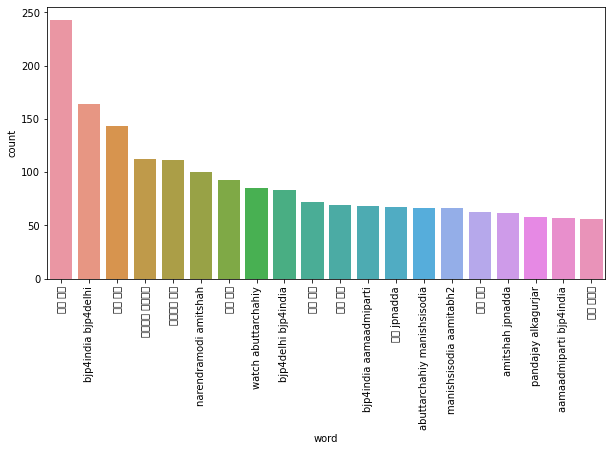

,word,count
0,अध यक,243
1,bjp4india bjp4delhi,164
2,कर रह,143
3,चपरम वरसम,112
4,वरसम लन,111
5,narendramodi amitshah,100
6,भक मन,93
7,watch abuttarchahiy,85
8,bjp4delhi bjp4india,83
9,उम दव,72


In [17]:
get_n_grams(df.clean,2,2,20)

In [10]:
 train_text=df.clean
train_on=df.label

In [11]:
df2=pd.read_csv('generic_sentiment_dataset_10k.csv')

In [19]:

df2.shape

(10000, 3)

In [20]:
df2.head()

,sentiment,text,label
0,neutral,Camera good,1
1,negative,OMG! I KNOW! I give myself a stroke everytim...,0
2,neutral,Good,1
3,positive,The company recorded revenues of E658 .1 milli...,2
4,positive,All is good,2


In [12]:
df2['clean']=df2['text'].apply(preprocess_text)
df2.drop(df2[(df2['label']==1)].index, inplace=True,axis=0)

In [13]:
test_text=df2.clean
test_on=df2.label

In [14]:
from sklearn.pipeline import Pipeline

In [15]:
def diffmodel(mod,train_text,train_on,test_text,test_on):
    try:
        model=Pipeline([('vectorizer',TfidfVectorizer()),('classifier',mod)])
        model.fit(train_text,train_on)
        prediction=model.predict(test_text)
        print(model['classifier'])
        print("Accuracy : ", accuracy_score(prediction,test_on))
        print("precision : ", precision_score(prediction,test_on,average='weighted'))
    except:
        print('can\'t',mod)

In [28]:
example = ['i m worst',
           'i m okay',
           'what is this phone',
           'battery life is good',
           'battery life is bad',
           'Battery Problem After 05 Month',
           'Phone stoped working after 5 months'
          ]
change=np.vectorize(preprocess_text)
example=change(example)
res=model.predict(example)
for i in res:
    if (i==0):
        print('NEGATIVE')
    else: 
        print('POSITIVE')

NEGATIVE
POSITIVE
POSITIVE
POSITIVE
NEGATIVE
NEGATIVE
NEGATIVE


In [27]:
models = [LogisticRegression(),SVC()]

In [18]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
for mod in tqdm(models):
    diffmodel(mod,train_text,train_on,test_text,test_on)

 50%|██████████████████████████████████████████                                          | 1/2 [00:08<00:08,  8.38s/it]

LogisticRegression()
Accuracy :  0.8957995762183721
precision :  0.8966375789618328


In [28]:
from tqdm import tqdm

In [16]:
diffmodel(LogisticRegression(),train_text,train_on,test_text,test_on)

LogisticRegression()
Accuracy :  0.8957995762183721
precision :  0.8966375789618328


In [17]:
diffmodel(SVC(),train_text,train_on,test_text,test_on)

SVC()
Accuracy :  0.9037766421538078
precision :  0.9043147977621473


In [19]:
 diffmodel(ExtraTreesClassifier(),train_text,train_on,test_text,test_on)

ExtraTreesClassifier()
Accuracy :  0.8955502929078898
precision :  0.8971697335980305


In [20]:
 diffmodel(KNeighborsClassifier(),train_text,train_on,test_text,test_on)

KNeighborsClassifier()
Accuracy :  0.722672317088371
precision :  0.8285587002164666


In [21]:
diffmodel(RandomForestClassifier(),train_text,train_on,test_text,test_on)

RandomForestClassifier()
Accuracy :  0.8950517262869251
precision :  0.8965397403631254
